# SVM: Results on IAN/IDA Data SET

In [ ]:
##### imports ############
import pandas as pd
import numpy as np
import json

import joblib

import os
import math

import torch
from torch.nn import BCEWithLogitsLoss
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from transformers import AdamW, XLNetTokenizer, XLNetModel, XLNetLMHeadModel, XLNetConfig
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tqdm import tqdm, trange
import matplotlib.pyplot as plt

from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn

from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

#from utils_crisis_classification import clean_text
from preprocessing_step import clean_text

from string import punctuation
from os import listdir
from numpy import array
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

import pandas as pd
import numpy as np
import collections
from collections import Counter

from sklearn.model_selection import train_test_split
import string

import re
from nltk.corpus import stopwords
from nltk import word_tokenize
STOPWORDS = set(stopwords.words('english'))

import pandas as pd
import numpy as pn
from numpy import mean

from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

import string

import collections
from collections import Counter

from string import punctuation
from os import listdir
from numpy import array

from pickle import load
from numpy import array

import re
from nltk.corpus import stopwords
from nltk import word_tokenize
STOPWORDS = set(stopwords.words('english'))

import tensorflow as tf
import tensorflow_addons as tfa
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.vis_utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.merge import concatenate


from keras.layers import LSTM
from sklearn.decomposition import PCA

import pickle
import numpy as np
from numpy import mean
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
import statistics as s

import matplotlib.pyplot as plt


import sys

##### imports ############
import pandas as pd
import numpy as np
import json

import joblib

import os
import math

import torch
from torch.nn import BCEWithLogitsLoss
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from transformers import AdamW, XLNetTokenizer, XLNetModel, XLNetLMHeadModel, XLNetConfig
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tqdm import tqdm, trange
import matplotlib.pyplot as plt

from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn

from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

#from utils_crisis_classification import clean_text

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

from transformers import AdamW
from sklearn.utils.class_weight import compute_class_weight
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import transformers
from transformers import AutoModel, BertTokenizerFast

# specify GPU
device = torch.device("cuda")

from Baseline_Models import Display_metrics,Display_classification_report,Confusion_matrix
from keras.backend import clear_session


In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay


from Baseline_Models import Create_TFIDF,Vector_Encoding_TFIDF,Create_BOW,Vector_Encoding_BOW

import numpy as np
from sklearn.metrics import average_precision_score


## Read IAN/IDA Data

In [ ]:
####################################################
#### read mixed data - verified ####################
####################################################
path_to_mixed_verif = '/home/wkhal001/Desktop/Mixed_data_verified/Mixed_data__ian_ida_verified.csv'

mixed_ida_ian_verified=pd.read_csv(path_to_mixed_verif) 
mixed_ida_ian_verified['label'].value_counts()

In [ ]:
Data_mixed = mixed_ida_ian_verified[['text','label']]
df_training = Data_mixed

# Inference (10 fold CV)

In [7]:
##### Use BEST model to calculate the other metrics #########
skf = StratifiedKFold(n_splits=10,shuffle=True,random_state=2018)

X = df_training['text']
TX = np.array(X.tolist())

Y = df_training['label']
TY= np.array(Y.tolist())
print(skf)

StratifiedKFold(n_splits=10, random_state=2018, shuffle=True)


In [8]:
%matplotlib inline

rep_fold =1
folds_results = {'f1':[],'recall':[],'precision':[]}

text_test_per_fold = []
pos_proba_ls = []
preds_ls = []
y_tests_ls = []
AP_results = []

for train_index, test_index in skf.split(TX,TY):

    print('--------- Fold ',str(rep_fold),'-------------------------')
    print('Length train index....',len(train_index))
    print('Length test index....',len(test_index))
    
    #### training/testing data ########################################
    X_train, X_test = TX[train_index], TX[test_index]
    y_train, y_test = TY[train_index], TY[test_index]
        
    
    ####### check distribution of positive samples on each fold ######
    count_test = (y_test == 1).sum()
    count_train = (y_train == 1).sum()
    print('postive samples in train......',count_train)
    print('postive samples in test......',count_test)
    print('------------------------------------------')
    
    corpus = []
    for x in X_train: 
        corpus.append(x)
    
    fold_tweets = []
    for x in X_test: 
        corpus.append(x) 
        fold_tweets.append(x)
    text_test_per_fold.append(fold_tweets)
    
    TFID = Create_TFIDF(corpus,1000,1,1)
    
    #### convert data to TF-IDF ########################################
    Train_X_TFIDF = Vector_Encoding_TFIDF(TFID,X_train)
    
    ###### defining parameter range ######
    param_grid = {'C':20 ,'gamma':0.1 ,'degree':2 ,'kernel':'rbf'} 
    
    ###### Train SVM ######
    SVM = SVC(C=param_grid['C'], kernel=param_grid['kernel'],degree=param_grid['degree'] ,gamma=param_grid['gamma'],probability=True) 
    SVM.fit(Train_X_TFIDF,y_train)
    
    ##### Predict ##########
    Test_X_TFIDF = Vector_Encoding_TFIDF(TFID,X_test)
    preds_prob = SVM.predict_proba(Test_X_TFIDF)
    pos_probs = preds_prob[:, 1]
    pos_proba_ls.append(pos_probs)
    
    _fold_AP = average_precision_score(y_test.tolist(),pos_probs)
    AP_results.append(_fold_AP)
    print("AP score for class 1 --->",_fold_AP)
    
    preds = SVM.predict(Test_X_TFIDF)
    preds_ls.append(preds)
    
    ##### classification results on the test set ##########
    dict_r = classification_report(y_test.tolist(), preds,output_dict = True)
    y_tests_ls.append(y_test.tolist())
    
    print('F1 score.....',dict_r['1']['f1-score'])
    #f1_list.append(dict_r['1']['f1-score'])
    folds_results['f1'].append(dict_r['1']['f1-score'])
    
    print('Recall.....',dict_r['1']['recall'])
    #recall_list.append(dict_r['1']['f1-score'])
    folds_results['recall'].append(dict_r['1']['recall'])
    
    print('Precision.....',dict_r['1']['precision'])
    #f1_list.append(dict_r['1']['f1-score'])
    #precision_list.append({rep: dict_r})
    folds_results['precision'].append(dict_r['1']['precision'])
    
    rep_fold = rep_fold + 1
    
    print('-------------------------------------------------')
    

--------- Fold  1 -------------------------
Length train index.... 4644
Length test index.... 516
postive samples in train...... 202
postive samples in test...... 23
------------------------------------------
AP score for class 1 ---> 0.926619026724216
F1 score..... 0.7906976744186046
Recall..... 0.7391304347826086
Precision..... 0.85
-------------------------------------------------
--------- Fold  2 -------------------------
Length train index.... 4644
Length test index.... 516
postive samples in train...... 202
postive samples in test...... 23
------------------------------------------
AP score for class 1 ---> 0.958781835971702
F1 score..... 0.8695652173913043
Recall..... 0.8695652173913043
Precision..... 0.8695652173913043
-------------------------------------------------
--------- Fold  3 -------------------------
Length train index.... 4644
Length test index.... 516
postive samples in train...... 202
postive samples in test...... 23
------------------------------------------
AP 

In [10]:
##############################################################################
############################## calculate results #############################
##############################################################################
import statistics

print('Average AUC-PR scores........',statistics.mean(AP_results))
print('Stdev AUC-PR scores........',statistics.stdev(AP_results))
print('\n')

print('Average F1 scores........',statistics.mean(folds_results['f1']))
print('Stdev F1 scores........',statistics.stdev(folds_results['f1']))
print('\n')

print('Average recall scores........',statistics.mean(folds_results['recall']))
print('Stdev recall scores........',statistics.stdev(folds_results['recall']))
print('\n')

print('Average precision scores........',statistics.mean(folds_results['precision']))
print('Stdev precision scores........',statistics.stdev(folds_results['precision']))


Average AUC-PR scores........ 0.9263257564182809
Stdev AUC-PR scores........ 0.020746946495979968


Average F1 scores........ 0.8424076527895689
Stdev F1 scores........ 0.04361821119415171


Average recall scores........ 0.7873517786561265
Stdev recall scores........ 0.06918062531497865


Average precision scores........ 0.9105716200910708
Stdev precision scores........ 0.04814958951574388


In [11]:
pos_proba_arr = np.concatenate(pos_proba_ls)
pos_y_test_arr = np.concatenate(y_tests_ls)
pos_preds_arr = np.concatenate(preds_ls)

np.savetxt("svm_probs_ian_ida_june_2024.txt",pos_proba_arr)
np.savetxt("svm_y_test_ian_ida_june_2024.txt",pos_y_test_arr)
np.savetxt("svm_preds_ian_ida_june_2024.txt",pos_preds_arr)

In [1]:
## Load saved data in text files ##
# Function to load a list from a text file
def load_list_from_file(file_path):
    with open(file_path, 'r') as file:
        # Read lines and strip newline characters
        items = [float(line.strip()) for line in file]
    return items

# Specify the path to your text file
file_path_probs = 'svm_probs_ian_ida_june_2024.txt'
file_path_preds = 'svm_preds_ian_ida_june_2024.txt'
file_path_y = 'svm_y_test_ian_ida_june_2024.txt'

# Load the list
probs_svm = load_list_from_file(file_path_probs)
preds_svm = load_list_from_file(file_path_preds)
ytest_svm = load_list_from_file(file_path_y)


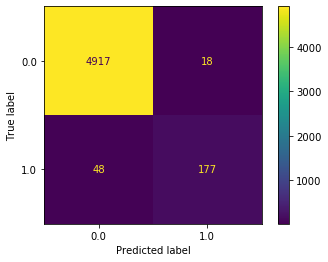

In [2]:
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
%matplotlib inline

cm = confusion_matrix(ytest_svm, preds_svm, labels=np.unique(ytest_svm))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(ytest_svm))
disp.plot()

In [3]:
disp.figure_.savefig('confusion_matrix_svm_ian_ida_final.png')

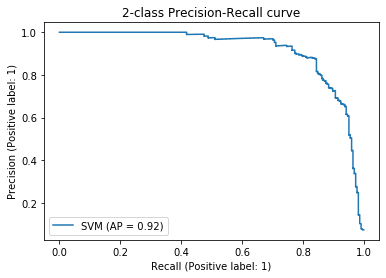

In [33]:
##########################################
### Read saved results to calculate AP ###
##########################################
precision, recall, thresholds = precision_recall_curve(pos_y_test_arr,pos_proba_arr)

display = PrecisionRecallDisplay.from_predictions(svm_ytest1, svm_probs1, name="SVM")
_ = display.ax_.set_title("2-class Precision-Recall curve")